In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from seaborn import load_dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

### Dataset de Classificação

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

link do dataset: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Rice_Cammeo_Osmancik.csv')
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
y = X['Class']
X.drop(['Class'],axis=1,inplace=True)

X.info() #Verificando valores nulos. De 3810 entradas, cada coluna tem 3810 valores não nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 208.5 KB


<Axes: xlabel='Major_Axis_Length', ylabel='Convex_Area'>

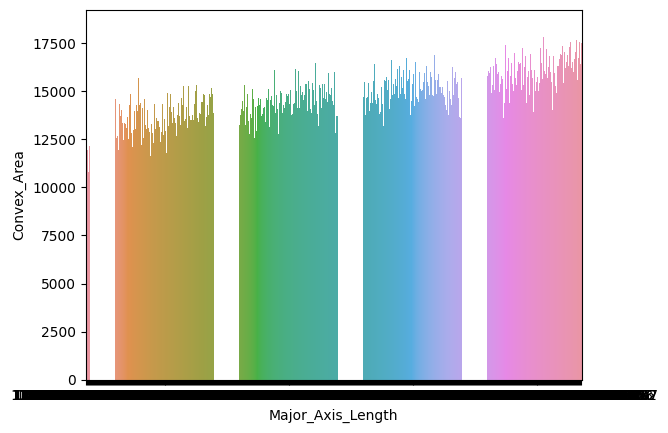

In [ ]:
sns.barplot(x="Major_Axis_Length", y="Convex_Area", data=X.head(500))

<Axes: >

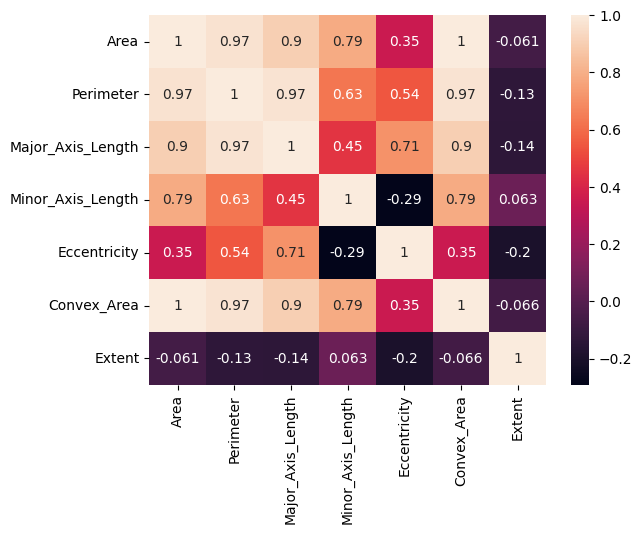

In [ ]:
sns.heatmap(X.corr(),annot=True)

In [ ]:
X.drop(['Extent'],axis=1,inplace=True) # Drop de coluna negativa

# Normalização
x2 = X.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
X = pd.DataFrame(x_scaled)

X.head()

,0,1,2,3,4,5
0,0.675937,0.879232,0.901216,0.532417,0.888011,0.693917
1,0.625330,0.714095,0.648087,0.670663,0.691980,0.646009
2,0.623394,0.750066,0.734349,0.588124,0.789846,0.635636
3,0.495071,0.524136,0.512800,0.581461,0.671227,0.496220
4,0.628146,0.781992,0.709138,0.620288,0.758067,0.662711


In [ ]:
# Função pra pegar a acurácia e deixar o código da próxima célula um pouco mais limpo
def get_acc(model):
  result = model.predict(X_test)
  acc = metrics.accuracy_score(result, y_test)
  return round(acc*100)

display(y)

0         Cammeo
1         Cammeo
2         Cammeo
3         Cammeo
4         Cammeo
          ...   
3805    Osmancik
3806    Osmancik
3807    Osmancik
3808    Osmancik
3809    Osmancik
Name: Class, Length: 3810, dtype: object

In [ ]:
tree1 = []
tree2 = []
knn1 = []
knn2 = []
mlp1 = []
mlp2 = []
svc1 = []
svc2 = []
rf = []
gboost = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, stratify=y)

  model = DecisionTreeClassifier(criterion="entropy").fit(X_train, np.ravel(y_train))
  tree1.append(get_acc(model))

  model2 = DecisionTreeClassifier(max_depth=5).fit(X_train, np.ravel(y_train))
  tree2.append(get_acc(model2))

  model3 = KNeighborsClassifier(n_neighbors=7, algorithm='brute').fit(X_train, np.ravel(y_train))
  knn1.append(get_acc(model3))

  model4 = KNeighborsClassifier(n_neighbors=5, algorithm='auto').fit(X_train, np.ravel(y_train))
  knn2.append(get_acc(model4))

  model5 = MLPClassifier(hidden_layer_sizes=(20,10), activation='tanh',max_iter=2000).fit(X_train, np.ravel(y_train))
  mlp1.append(get_acc(model5))

  model6 = MLPClassifier(hidden_layer_sizes=(50,25), activation='identity',max_iter=1000).fit(X_train, np.ravel(y_train))
  mlp2.append(get_acc(model6))

  model7 = svm.SVC(kernel='sigmoid', gamma='scale', C=1.0).fit(X_train, np.ravel(y_train))
  svc1.append(get_acc(model7))

  model8 = svm.SVC(kernel='linear', gamma='auto', C=2.0).fit(X_train, np.ravel(y_train))
  svc2.append(get_acc(model8))

  model9 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, np.ravel(y_train))
  rf.append(get_acc(model9))

  model10 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, np.ravel(y_train))
  gboost.append(get_acc(model10))

print("Média da árvore 1: %.3f"%np.mean(tree1))
print("Média da árvore 2: %.3f"%np.mean(tree2))
print("Média do knn 1: %.3f"%np.mean(knn1))
print("Média do knn 2: %.3f"%np.mean(knn2))
print("Média da mlp 1: %.3f"%np.mean(mlp1))
print("Média da mlp 2: %.3f"%np.mean(mlp2))
print("Média do svc 1: %.3f"%np.mean(svc1))
print("Média do svc 2: %.3f"%np.mean(svc2))
print("Média da random forest: %.3f"%np.mean(rf))
print("Média do gboost: %.3f"%np.mean(gboost))

Média da árvore 1: 88.400
Média da árvore 2: 92.100
Média do knn 1: 91.900
Média do knn 2: 91.900
Média da mlp 1: 92.500
Média da mlp 2: 92.700
Média do svc 1: 55.700
Média do svc 2: 92.500
Média da random forest: 92.300
Média do gboost: 92.300


### Dataset de Regressão

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

link para o dataset: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [ ]:
X2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Concrete_Data.csv')
X2.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Water  (component 4)(kg in a m^3 mixture)'>

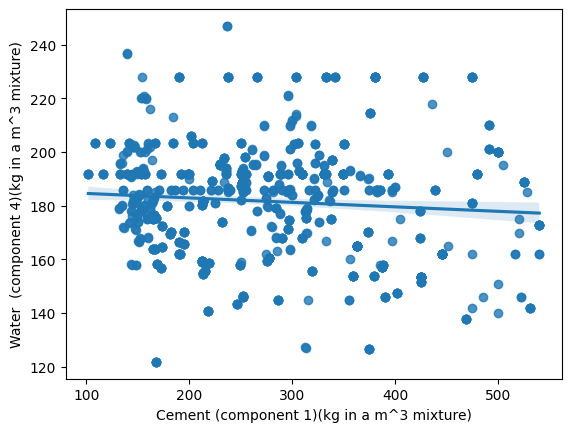

In [ ]:
sns.regplot(data=X2, x="Cement (component 1)(kg in a m^3 mixture)", y="Water  (component 4)(kg in a m^3 mixture)")

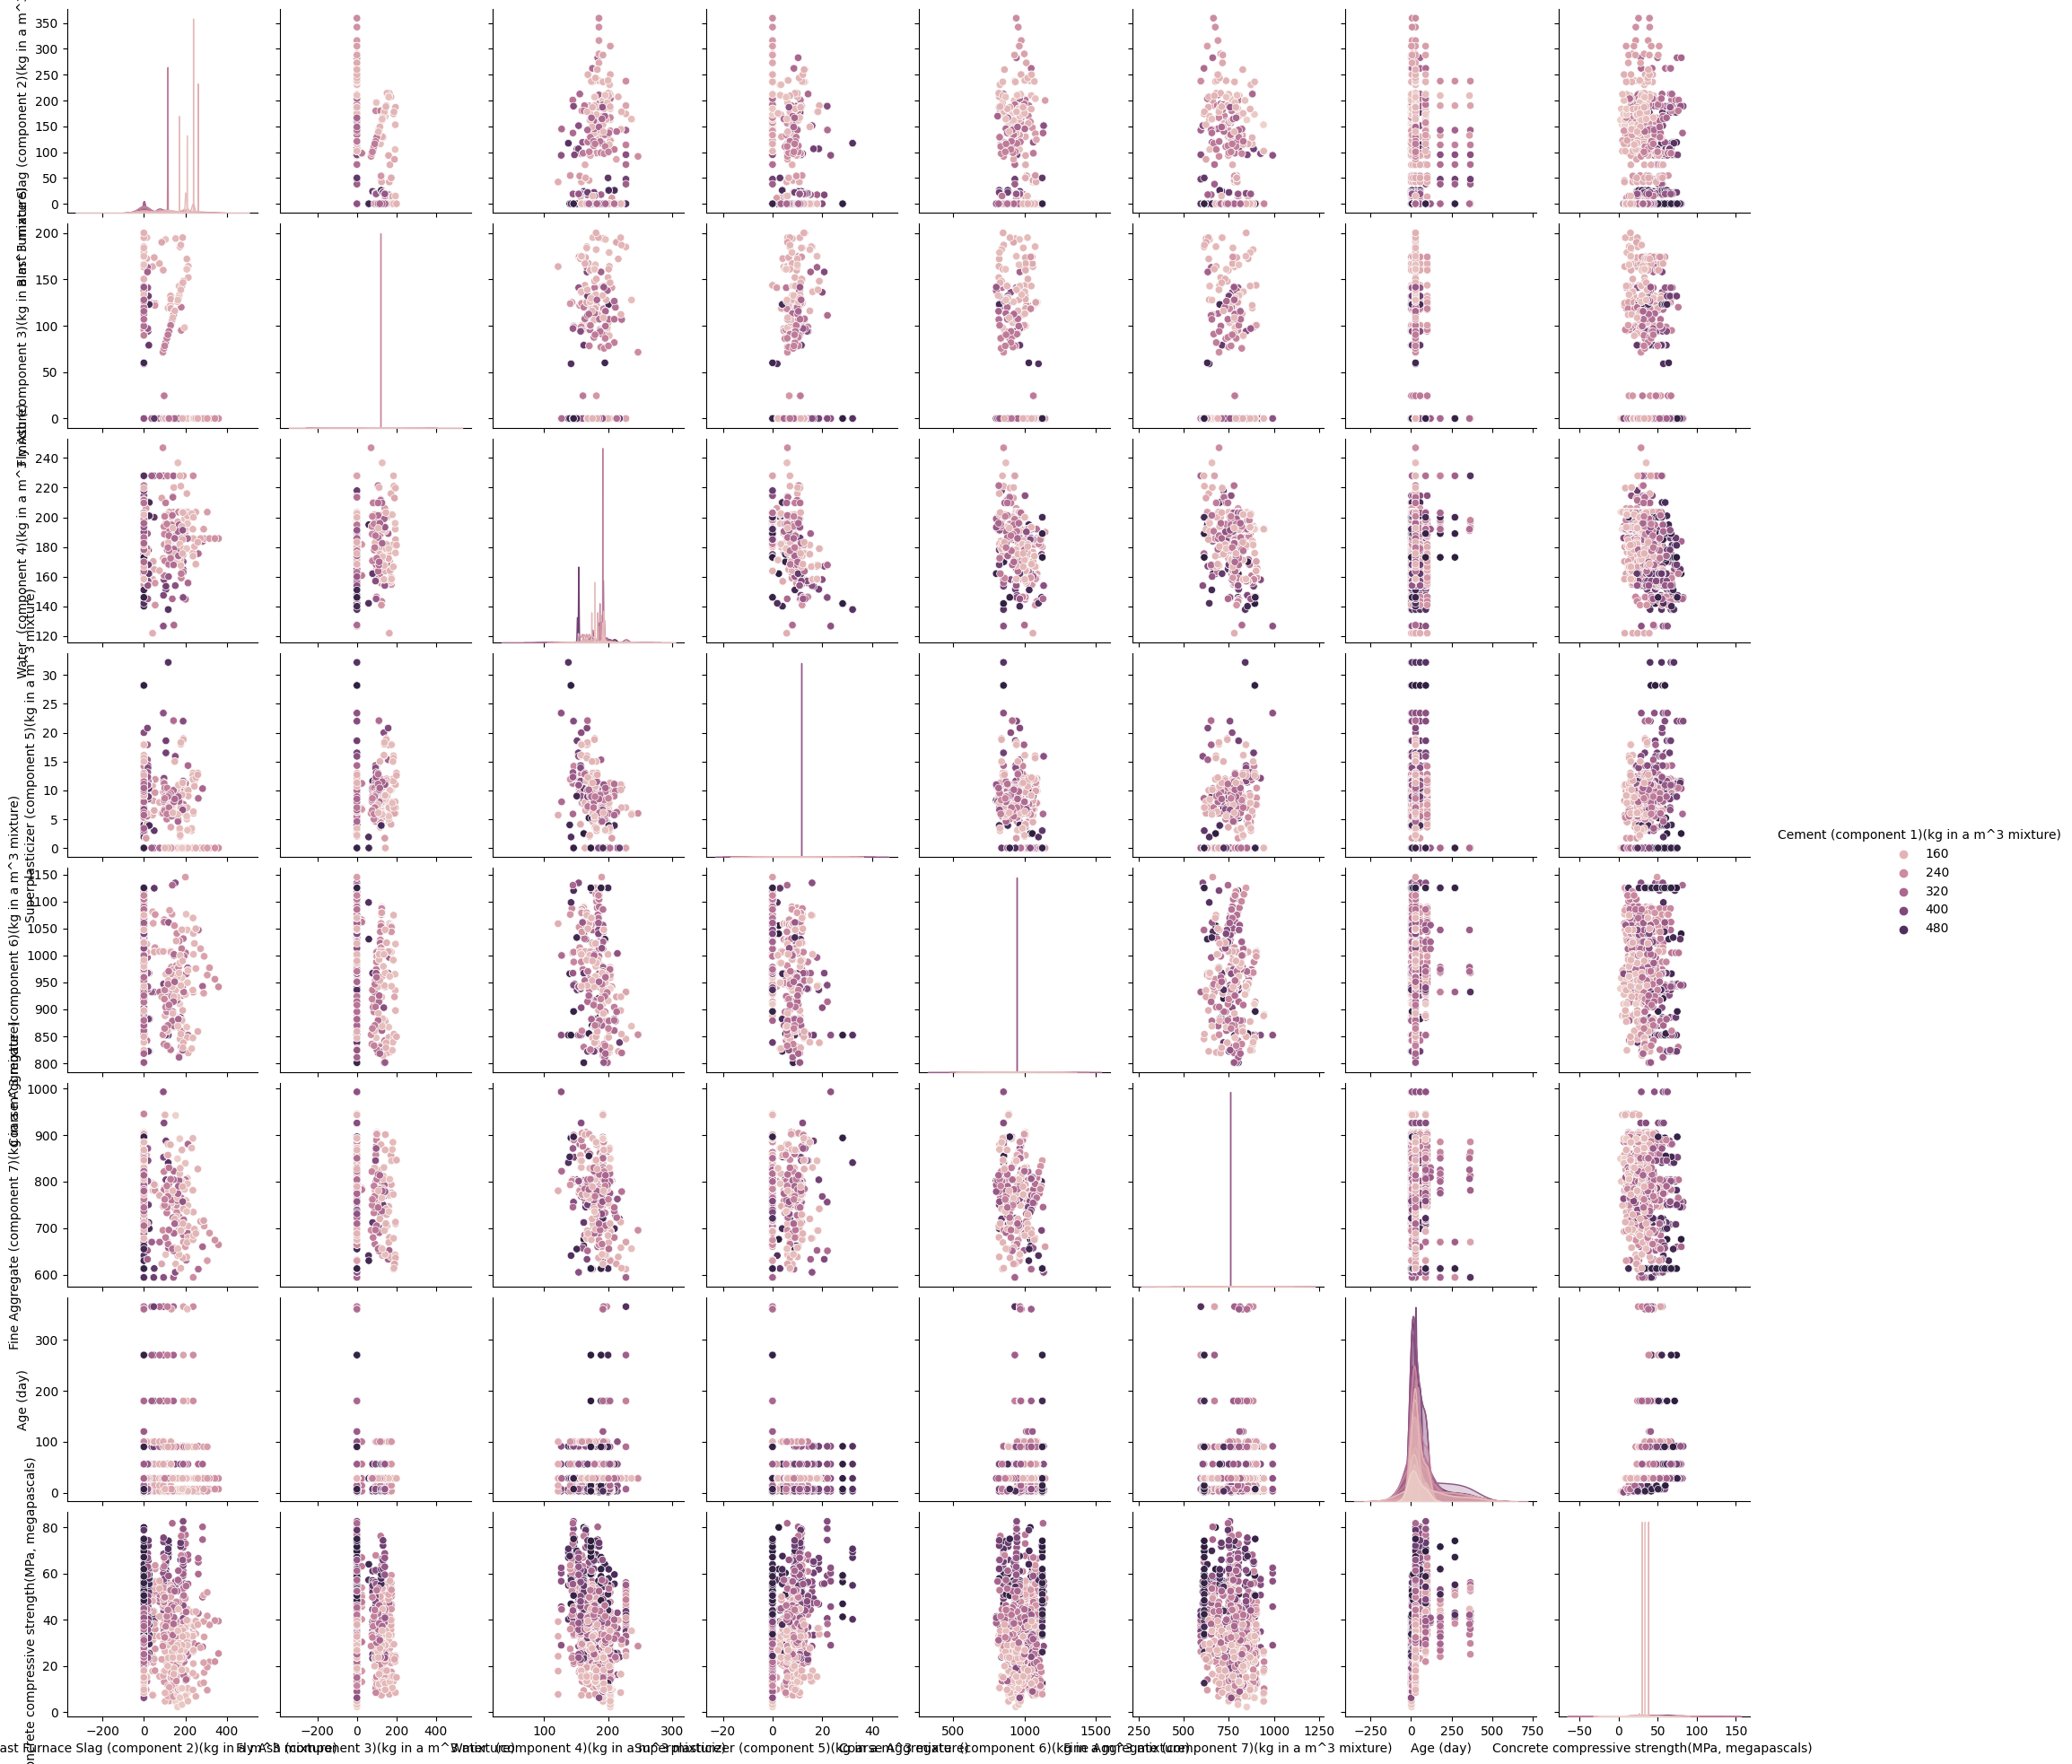

In [ ]:
sns.pairplot(data=X2, hue="Cement (component 1)(kg in a m^3 mixture)" )

In [ ]:
y2 = X2['Concrete compressive strength(MPa, megapascals) ']

X2.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1, inplace=True)

df = X2.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
X2 = pd.DataFrame(x_scaled)

# extrai a primeira coluna, que é o labely2 = tips[0] X2 = tips.loc[:,1:columns-1]

X2.head()

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


In [ ]:
treeR1_mse = []
treeR1_rmse = []
treeR1_mae = []
treeR2_mse = []
treeR2_rmse = []
treeR2_mae = []
knnR1_mse = []
knnR1_rmse = []
knnR1_mae = []
knnR2_mse = []
knnR2_rmse = []
knnR2_mae = []
mlpR1_mse = []
mlpR1_rmse = []
mlpR1_mae = []
mlpR2_mse = []
mlpR2_rmse = []
mlpR2_mae = []
svrR1_mse = []
svrR1_rmse = []
svrR1_mae = []
svrR2_mse = []
svrR2_rmse = []
svrR2_mae = []
rfR_mse = []
rfR_rmse = []
rfR_mae = []
gboostR_mse = []
gboostR_rmse = []
gboostR_mae = []

In [ ]:
for i in range(10):
  X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

  model11 = DecisionTreeRegressor(criterion="absolute_error").fit(X2_train, y2_train).predict(X2_test)
  mse = mean_squared_error(model11, y2_test)
  treeR1_mse.append(mse)
  treeR1_rmse.append(np.sqrt(mse))
  treeR1_mae.append(mean_absolute_error(model11, y2_test))

  model12 = DecisionTreeRegressor(max_depth=5).fit(X2_train, y2_train).predict(X2_test)
  mse2 = mean_squared_error(model12, y2_test)
  treeR2_mse.append(mse2)
  treeR2_rmse.append(np.sqrt(mse2))
  treeR2_mae.append(mean_absolute_error(model12, y2_test))

  model13 = KNeighborsRegressor(n_neighbors=7, algorithm='brute').fit(X2_train, y2_train).predict(X2_test)
  mse3 = mean_squared_error(model13, y2_test)
  knnR1_mse.append(mse3)
  knnR1_rmse.append(np.sqrt(mse3))
  knnR1_mae.append(mean_absolute_error(model13, y2_test))

  model14 = KNeighborsRegressor(n_neighbors=5, algorithm='ball_tree').fit(X2_train, y2_train).predict(X2_test)
  mse4 = mean_squared_error(model14, y2_test)
  knnR2_mse.append(mse4)
  knnR2_rmse.append(np.sqrt(mse4))
  knnR2_mae.append(mean_absolute_error(model14, y2_test))

  model15 = MLPRegressor(hidden_layer_sizes=(20,10), activation='relu',max_iter=2000).fit(X2_train, y2_train).predict(X2_test)
  mse5 = mean_squared_error(model15, y2_test)
  mlpR1_mse.append(mse5)
  mlpR1_rmse.append(np.sqrt(mse5))
  mlpR1_mae.append(mean_absolute_error(model15, y2_test))

  model16 = MLPRegressor(hidden_layer_sizes=(50,25), activation='identity',max_iter=1000).fit(X2_train, y2_train).predict(X2_test)
  mse6 = mean_squared_error(model16, y2_test)
  mlpR2_mse.append(mse6)
  mlpR2_rmse.append(np.sqrt(mse6))
  mlpR2_mae.append(mean_absolute_error(model16, y2_test))

  model17 = svm.SVR(kernel='sigmoid', gamma='scale', C=1.0).fit(X2_train, y2_train).predict(X2_test)
  mse7 = mean_squared_error(model17, y2_test)
  svrR1_mse.append(mse7)
  svrR1_rmse.append(np.sqrt(mse7))
  svrR1_mae.append(mean_absolute_error(model17, y2_test))

  model18 = svm.SVR(kernel='linear', gamma='auto', C=2.0).fit(X2_train, y2_train).predict(X2_test)
  mse8 = mean_squared_error(model18, y2_test)
  svrR2_mse.append(mse8)
  svrR2_rmse.append(np.sqrt(mse8))
  svrR2_mae.append(mean_absolute_error(model18, y2_test))

  model19 = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=0).fit(X2_train, y2_train).predict(X2_test)
  mse9 = mean_squared_error(model19, y2_test)
  rfR_mse.append(mse9)
  rfR_rmse.append(np.sqrt(mse9))
  rfR_mae.append(mean_absolute_error(model19, y2_test))

  model20 = GradientBoostingRegressor(loss='absolute_error',n_estimators=200, learning_rate=0.5, max_depth=5, random_state=0).fit(X2_train, y2_train).predict(X2_test)
  mse10 = mean_squared_error(model20, y2_test)
  gboostR_mse.append(mse10)
  gboostR_rmse.append(np.sqrt(mse10))
  gboostR_mae.append(mean_absolute_error(model20, y2_test))

print("Árvore 1:")
print("    MSE: %.3f"%np.mean(treeR1_mse))
print("    RMSE: %.3f"%np.mean(treeR1_rmse))
print("    MAE: %.3f\n"%np.mean(treeR1_mae))
print("Árvore 2:")
print("    MSE: %.3f"%np.mean(treeR2_mse))
print("    RMSE: %.3f"%np.mean(treeR2_rmse))
print("    MAE: %.3f\n"%np.mean(treeR2_mae))
print("KNN 1:")
print("    MSE: %.3f"%np.mean(knnR1_mse))
print("    RMSE: %.3f"%np.mean(knnR1_rmse))
print("    MAE: %.3f\n"%np.mean(knnR1_mae))
print("KNN 2:")
print("    MSE: %.3f"%np.mean(knnR2_mse))
print("    RMSE: %.3f"%np.mean(knnR2_rmse))
print("    MAE: %.3f\n"%np.mean(knnR2_mae))
print("MLP 1:")
print("    MSE: %.3f"%np.mean(mlpR1_mse))
print("    RMSE: %.3f"%np.mean(mlpR1_rmse))
print("    MAE: %.3f\n"%np.mean(mlpR1_mae))
print("MLP 2:")
print("    MSE: %.3f"%np.mean(mlpR2_mse))
print("    RMSE: %.3f"%np.mean(mlpR2_rmse))
print("    MAE: %.3f\n"%np.mean(mlpR2_mae))
print("SVR 1:")
print("    MSE: %.3f"%np.mean(svrR1_mse))
print("    RMSE: %.3f"%np.mean(svrR1_rmse))
print("    MAE: %.3f\n"%np.mean(svrR1_mae))
print("SVR 2:")
print("    MSE: %.3f"%np.mean(svrR2_mse))
print("    RMSE: %.3f"%np.mean(svrR2_rmse))
print("    MAE: %.3f\n"%np.mean(svrR2_mae))
print("Random Forest:")
print("    MSE: %.3f"%np.mean(rfR_mse))
print("    RMSE: %.3f"%np.mean(rfR_rmse))
print("    MAE: %.3f\n"%np.mean(rfR_mae))
print("Gboost:")
print("    MSE: %.3f"%np.mean(gboostR_mse))
print("    RMSE: %.3f"%np.mean(gboostR_rmse))
print("    MAE: %.3f\n"%np.mean(gboostR_mae))

Árvore 1:
    MSE: 44.858
    RMSE: 6.656
    MAE: 4.282

Árvore 2:
    MSE: 69.040
    RMSE: 8.300
    MAE: 6.302

KNN 1:
    MSE: 91.282
    RMSE: 9.532
    MAE: 7.391

KNN 2:
    MSE: 87.769
    RMSE: 9.345
    MAE: 7.138

MLP 1:
    MSE: 54.483
    RMSE: 7.284
    MAE: 5.545

MLP 2:
    MSE: 115.647
    RMSE: 10.739
    MAE: 8.548

SVR 1:
    MSE: 207.779
    RMSE: 14.390
    MAE: 11.559

SVR 2:
    MSE: 119.758
    RMSE: 10.926
    MAE: 8.765

Random Forest:
    MSE: 46.216
    RMSE: 6.776
    MAE: 5.285

Gboost:
    MSE: 26.400
    RMSE: 5.116
    MAE: 3.501

